The implementation of Naive Bayes and Logistic Regression is supposed to be from scratch.

# Naive Bayes (50)

Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable.

$P(y \mid x_1, \dots, x_n) = \frac{P(y) P(x_1, \dots, x_n \mid y)} {P(x_1, \dots, x_n)}$

$P(x_i | y, x_1, \dots, x_{i-1}, x_{i+1}, \dots, x_n) = P(x_i | y)$

$P(y \mid x_1, \dots, x_n) = \frac{P(y) \prod_{i=1}^{n} P(x_i \mid y)}{P(x_1, \dots, x_n)}$

$\begin{align}\begin{aligned}P(y \mid x_1, \dots, x_n) \propto P(y) \prod_{i=1}{n} P(x_i \mid y)\\\Downarrow\\\hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i \mid y)\end{aligned}\end{align}$

In spite of their apparently over-simplified assumptions, naive Bayes classifiers have worked quite well in many real-world situations, famously document classification and spam filtering. They require a small amount of training data to estimate the necessary parameters. 

Naive Bayes learners and classifiers can be extremely fast compared to more sophisticated methods. The decoupling of the class conditional feature distributions means that each distribution can be independently estimated as a one dimensional distribution. This in turn helps to alleviate problems stemming from the curse of dimensionality.

On the flip side, although naive Bayes is known as a decent classifier, it is known to be a bad estimator, so the probability outputs are not to be taken too seriously.

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import numpy.typing as npt
from enum import Enum
np.random.seed(123)

### Dataset
Load the given dataset. The last column contains the labels. 

Preprocess if needed.

In [3]:
with open("data.txt", "r") as dataset:
    data = np.array(list(map(lambda line: [float(elem) for elem in line.split()], dataset.readlines())), dtype=np.float64)
data[0,:]

array([0.10635, 0.12803, 0.     ])

Consider the values of each class. Create a dictionary for the dataset, with classes as keys and the entries of the dataset as values.

In [7]:
def create_class_dictionary(data: npt.NDArray[np.float64]) -> dict[int, list[npt.NDArray[np.float64]]]:
  result: dict[int, list[npt.NDArray[np.float64]]] = {}
  for row in data:
    key = int(row[2])
    if key not in result:
      result[key] = []
    result[key].append(np.array([row[0], row[1]], dtype=np.float64))
  return result

For the dataset dictionary, find the mean and standard deviation of all classes. The output format should be a list of two lists, the first one the mean and standard deviation of the first column and the second one is for the second column.

In [8]:
class InfoType(Enum):
  MEAN = 1
  STD = 2

def info(data: list[npt.NDArray[np.float64]]) -> list[dict[InfoType, float]]:
  np_data = np.array(data, dtype=np.float64)
  result: list[dict[InfoType, float]] = []
  for column in np_data.T:
    result.append({InfoType.MEAN: np.mean(column), InfoType.STD: np.std(column)})
  return result

In [11]:
def class_info(class_dictionary: dict[int, list[npt.NDArray[np.float64]]]) -> dict[int, list[dict[InfoType, float]]]:
  result: dict[int, list[dict[InfoType, float]]] = {}
  for class_type, data in class_dictionary.items():
    result[class_type] = info(data)
  return result
print(class_info(create_class_dictionary(data)))

{0: [{<InfoType.MEAN: 1>: -0.0058601171875000005, <InfoType.STD: 2>: 0.09924147849903169}, {<InfoType.MEAN: 1>: 0.0019293359375000003, <InfoType.STD: 2>: 0.10099018121338403}], 1: [{<InfoType.MEAN: 1>: -0.0017408606557377047, <InfoType.STD: 2>: 0.10214804240357336}, {<InfoType.MEAN: 1>: 0.004170553278688526, <InfoType.STD: 2>: 0.10871569789667496}]}


### Visualization
Use the imported libraries to visualize the given data. 

Why is the info step valid in this dataset? 

What is the type of this dataset's distribution? With other distribution types, what action would be needed to obtain the mean and standard variation info?

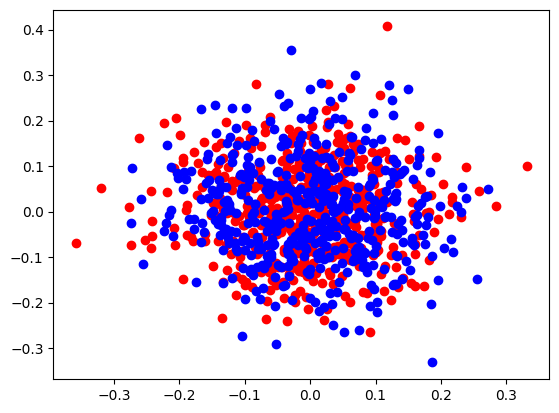

In [14]:
classes = create_class_dictionary(data)
plt.scatter(np.array(classes[0])[:,0], np.array(classes[0])[:,1], color="r")
plt.scatter(np.array(classes[1])[:,0], np.array(classes[1])[:,1], color="b")
plt.show()

### Model Details

As explained above, to create this model, you need a prior function and a likelihood function.

In the likelihood function, you need to calculate the probability of the query belonging to a class. 

In [8]:
def prior(class_dictionary: dict[int, list[npt.NDArray[np.float64]]], labels):
  #TODO
  pass

In [9]:
def likelihood(class_dictionary, query):
  #TODO
  pass

### Predict


In [10]:
def predict(data, labels, query):
  #TODO
  pass

In [11]:
def NB(data, labels, queries):
  #TODO: call the predict function for all queries
  pass

### Test
To test the model, import a suitable dataset from sklearn library to check the accuracy of your model. Then import GaussianNB from sklearn and compare your model's result with it.

In [12]:
def train_test_split(data, labels, test_size):
  #TODO return X_train, X_test, y_train, y_test
  pass

In [14]:
def accuracy(ground_truth, predictions):
  # call the NB function for your chosen dataset
  # calculate accuracy
  pass

In [15]:
# compare with GaussianNB from sklearn

# Linear Regression (35)

Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.

Ordinary least squares Linear Regression.

LinearRegression from sklearn.linear_model fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

In this section, you will implement a simple linear regression model using sklearn. Only the first feature of the diabetes dataset is required for this part.

In [44]:
from sklearn.metrics import r2_score
from sklearn import datasets, linear_model

In [45]:
# Special thanks to Hooman Keshvari for his helps on this part
diabetes_X, diabetes_Y = datasets.load_diabetes(return_X_y=True)
diabetes_X = diabetes_X[:,0] # Change this so that your model will use only one feature (arbitary)
print(diabetes_X.shape)
print(diabetes_Y.shape)

(442,)
(442,)


Split the data into training and testing sets.

In [46]:
import sklearn.model_selection
diabetes_X_train, diabetes_X_test, diabetes_Y_train, diabetes_Y_test = sklearn.model_selection.train_test_split(diabetes_X, diabetes_Y, test_size=0.1)

Create the model using sklearn. Then train it using the training set.

In [47]:
model = linear_model.LinearRegression()
model.fit(diabetes_X_train.reshape(-1,1), diabetes_Y_train)

LinearRegression()

Make predictions for the test set.

In [48]:
predicted = model.predict(diabetes_X_test.reshape(-1, 1))
predicted

array([154.00070848, 142.56361062, 136.20966736, 127.31414679,
       151.45913118, 145.10518792, 166.708595  , 169.2501723 ,
       145.10518792, 148.91755388, 166.708595  , 160.35465174,
       166.708595  , 146.37597657, 157.81307444, 162.89622905,
       124.77256949, 148.91755388, 167.97938365, 167.97938365,
       132.3973014 , 141.29282196, 160.35465174, 174.33332691,
       156.54228579, 157.81307444, 166.708595  , 137.48045601,
       157.81307444, 169.2501723 , 142.56361062, 148.91755388,
       162.89622905, 171.79174961, 167.97938365, 124.77256949,
       171.79174961, 157.81307444, 138.75124466, 169.2501723 ,
       154.00070848, 166.708595  , 152.72991983, 175.60411556,
       169.2501723 ])

Visualize your predictions and compare them to ground truth using the imported libraries.

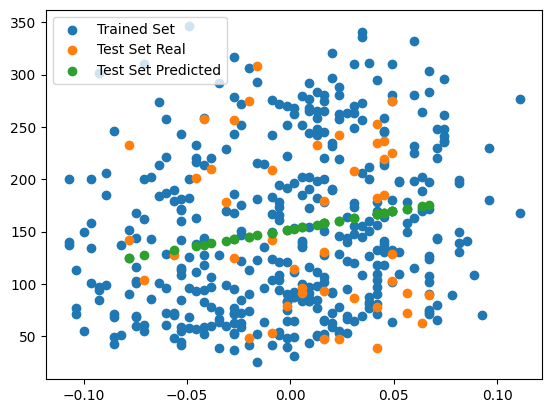

In [49]:
plt.scatter(diabetes_X_train, diabetes_Y_train, label='Trained Set')
plt.scatter(diabetes_X_test, diabetes_Y_test, label='Test Set Real')
plt.scatter(diabetes_X_test, predicted, label='Test Set Predicted')
plt.legend()
plt.show()

# Logistic Regression (15 + 50)

This type of statistical model (also known as logit model) is often used for classification and predictive analytics. Logistic regression estimates the probability of an event occurring, such as voted or didn't vote, based on a given dataset of independent variables.

$S(h(x)) = \frac{1}{1 + e^{-(\theta_0 + \theta_1 x_1 + \theta_1 x_2 + \cdots + \theta_n x_n)}} = \frac{1}{1 + e^{-\theta^T x}} \tag{2}$

The sigmoid function is of importance here and is defined as:

$S(x) = \frac{1}{1 + e^{-x}}$






Calculate the sigmoid function and visualize it.

In [17]:
import math
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

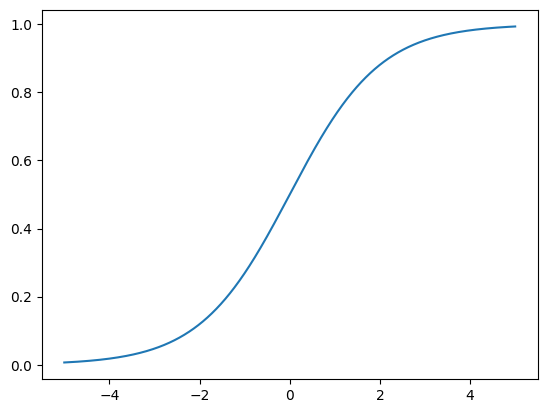

In [18]:
x = np.linspace(-5, 5, 1000)
y = sigmoid(x)
plt.plot(x, y)
plt.show()

# Dataset
Load the given dataset (same as naive bayes). Add a new column at the end of the dataset containing only 1s.

In [26]:
with open("data.txt", "r") as dataset:
    data = np.array(list(map(lambda line: [float(elem) for elem in line.split()], dataset.readlines())), dtype=np.float64)
label = data[:, 2]
data = np.c_[data[:, :2], np.ones(len(data))] # https://stackoverflow.com/a/8505658/4213397

### Predictions

Simply implement the math above to make predictions. Since we are using numbers here, define the threshold of 0.5 for classification.

In [8]:
def predict(weights: npt.NDArray[np.float64], x: npt.NDArray[np.float64], threshold = 0.5) -> bool:
  return sum(np.multiply(weights, x)) > threshold

### Loss Function
Cross-entropy loss, or log loss, measures the performance of a classification model whose output is a probability value between 0 and 1. Cross-entropy loss increases as the predicted probability diverges from the actual label. So predicting a probability of .012 when the actual observation label is 1 would be bad and result in a high loss value. A perfect model would have a log loss of 0.

In binary classification, where the number of classes M
 equals 2, cross-entropy can be calculated as:

$−(ylog(p)+(1−y)log(1−p))$


In [9]:
def cross_entropy(y_true: npt.NDArray[np.float64], y_pred: npt.NDArray[np.float64]) -> npt.NDArray[np.float64]:
  return -(y_true * np.log(y_pred)) + (1 - y_true) * np.log(1 - y_pred)

### Gradient Descent

Gradient Descent is an optimization algorithm for finding a local minimum of a differentiable function. Gradient descent in machine learning is simply used to find the values of a function's parameters (coefficients) that minimize a cost function as far as possible.

$\theta := \theta - \alpha \nabla_\theta H \tag{6}$

In [36]:
# Thanks to Hooman Keshvari for this part of code
from sklearn.metrics import accuracy_score
def gradient_descent(x: npt.NDArray[np.float64], y: npt.NDArray[np.float64], weight: npt.NDArray[np.float64], num_of_epochs: int, learning_rate = 0.005):
  accuracy: list[float] = []
  loss: list[float] = []
  for _ in range(num_of_epochs):
    predicted_y = np.array(list(map(lambda x_elem: int(predict(weight, x_elem)), x)), dtype=np.float64)
    accuracy.append(accuracy_score(y, predicted_y))
    loss.append(np.mean(cross_entropy(y, sigmoid(predicted_y))))
    gradient = np.dot(x.T, predicted_y - y)
    weight -= learning_rate * gradient
  return weight, accuracy, loss

In [23]:
def LR(train_set: npt.NDArray[np.float64], labels: npt.NDArray[np.float64], test_set: npt.NDArray[np.float64], num_of_epochs: int, learning_rate = 0.005):
  weight = np.zeros(train_set.shape[1])
  weight, accuracy, loss = gradient_descent(train_set, labels, weight, num_of_epochs, learning_rate)
  results = np.array(list(map(lambda x_elem: int(predict(weight, x_elem)), test_set)), dtype=np.float64)
  return results, accuracy, loss

### Test

To test the model, import a suitable dataset from sklearn library to check the accuracy of your model. Then import LogisticRegression from sklearn and compare your model's result with it.



In [37]:
import sklearn.model_selection
from sklearn import linear_model
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(data, label, test_size=0.1)
results, accuracy, loss = LR(x_train, y_train, x_test, 100)
logistic_regression = linear_model.LogisticRegression()
logistic_regression.fit(x_train, y_train)
logistic_regression_predictions = logistic_regression.predict(x_test)
print("LR results:", results)
print("LR accuracy:", accuracy)
print("LR loss:", loss)
print("Logistic Regression Predictions:", logistic_regression_predictions)

LR results: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
LR accuracy: [0.5088888888888888, 0.4911111111111111, 0.5088888888888888, 0.4911111111111111, 0.5088888888888888, 0.4911111111111111, 0.5088888888888888, 0.4911111111111111, 0.5088888888888888, 0.4911111111111111, 0.5088888888888888, 0.4911111111111111, 0.5088888888888888, 0.4911111111111111, 0.5088888888888888, 0.4911111111111111, 0.5088888888888888, 0.4911111111111111, 0.5088888888888888, 0.4911111111111111, 0.5088888888888888, 0.4911111111111111, 0.5088888888888888, 0.4911111111111111, 0.5088888888888888, 0.4911111111111111, 0.5088888888888888, 0.4911111111111111, 0.5088888888888888, 0.4911111111111111, 0.5088888888888888, 0.4911111111111111, 0.5088888888888888, 0.491111

### Visualization

During your model's training, save the accuracy and loss of each epoch, and then plot them using the imported libraries. Explain the pattern. If the result is not satisfactory, change the learning rate, num of epochs, initial weights, etc and observe their effects on the result.

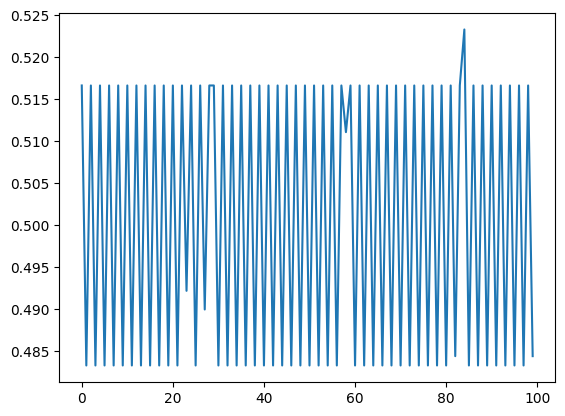

In [34]:
plt.plot(range(0, len(accuracy)), accuracy)
plt.show()

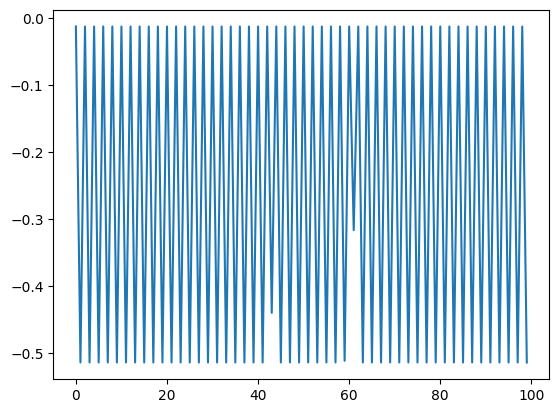

In [38]:
plt.plot(range(0, len(loss)), loss)
plt.show() # Bomb